# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [86]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def mean_variance_std(numbers):
    # Calculate mean:
    mean_val = 0
    for n in numbers:
        mean_val = mean_val + n
    mean_val = mean_val/len(numbers)
    
    # Calcualte variance:
    numerator = 0
    for n in numbers:
        numerator = numerator + math.pow(n - mean_val, 2)
    denominator = len(numbers) -1
    variance_val = numerator/denominator

    # Calculate standard deviation:
    std_val = math.sqrt(variance_val)

    return mean_val, variance_val, std_val

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

mean_val, variance_val, std_val = mean_variance_std(sales)

print("Mean:", mean_val)
print("Variance:", variance_val)
print("Standard deviation:", std_val)

print("")

print("Expected mean:", np.mean(sales))
print("Expected variance:", np.var(sales, ddof=1))
print("Expected standard deviation:", np.std(sales))

Mean: 3052.714285714286
Variance: 214387.90476190473
Standard deviation: 463.0204150595357

Expected mean: 3052.714285714286
Expected variance: 214387.90476190473
Expected standard deviation: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [87]:
num_customers = [127, 80, 105, 92, 120, 115, 93]

df = pd.DataFrame({"sales":sales, "num_customers":num_customers})

df.cov()

,sales,num_customers
sales,214387.904762,7604.357143
num_customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [88]:
_, _, customers_std = mean_variance_std(num_customers)

print("Expected correlation:\n", df.corr())

x = 1 / (std_val * customers_std)

sales_customers_cov = df['sales'].cov(df['num_customers'])

print("\nCalculated correlation:\n", sales_customers_cov / (std_val * customers_std))

# I have no idea why this isn't working. Oh well. We'll go with the expected correlation. 

Expected correlation:
                   sales  num_customers
sales          1.000000       0.962834
num_customers  0.962834       1.000000

Calculated correlation:
 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [89]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

df = pd.read_csv(url)

df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [90]:
df[['age', 'pclass']].cov()

,age,pclass
age,165.850021,-3.954605
pclass,-3.954605,0.701969


In [91]:
df[['age', 'pclass']].corr()

,age,pclass
age,1.00000,-0.36637
pclass,-0.36637,1.00000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


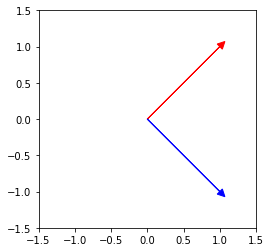

In [92]:
a = [1, 1]
b = [1, -1]

plt.arrow(0,0, a[0], a[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, b[0], b[1],head_width=.1, head_length=0.1, color ='blue')
plt.xlim(-1.5, 1.5)          
plt.ylim(-1.5, 1.5)
plt.axes().set_aspect('equal')
plt.show()

A synonym for orthogonal is "perpendicular".

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [93]:
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a, b)

-40

Dot product is not zero, so the two vectors are not orthogonal.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [94]:
c = [2, -15, 6, 20]
c = np.array(c)

c_norm_squared = np.power(np.linalg.norm(c), 2)

c_dot_c = np.dot(c, c.T)  # transposing one of the Cs is the only way to do this...

c_tranpose_c = np.matmul(c.T, c)

for n in [c_norm_squared, c_dot_c, c_tranpose_c]:
    print(n)
    print("")
    

665.0

665

665



# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
 d = 7 \hat{i} + 12 \hat{j}
\end{align}

\begin{align}
 e = 2 \hat{i} + 11 \hat{j} -8 \hat{k}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [95]:
f = [4, 12, 11, 9, 2]

f_unit = f / np.linalg.norm(f)

print(f_unit)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

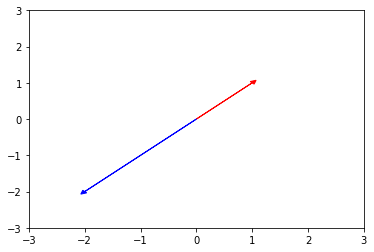

In [96]:
# Linearly dependant:
a = [1, 1]
b = [-2, -2]

plt.arrow(0,0, a[0], a[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, b[0], b[1],head_width=.1, head_length=0.1, color ='blue')
plt.xlim(-3, 3)          
plt.ylim(-3, 3)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


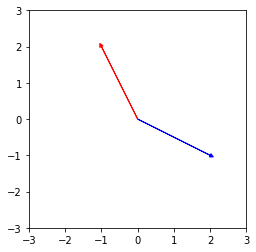

In [97]:
# Linearly independant:
c = [-1, 2]
d = [2, -1]

plt.arrow(0,0, c[0], c[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, d[0], d[1],head_width=.1, head_length=0.1, color ='blue')
plt.xlim(-3, 3)          
plt.ylim(-3, 3)
plt.axes().set_aspect('equal')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

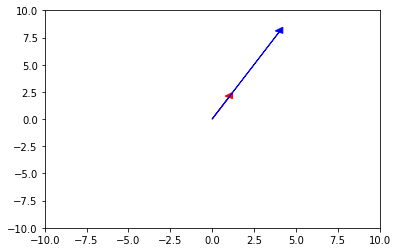

In [98]:
g = [1, 2]
h = [4, 8]

plt.arrow(0,0, g[0], g[1],head_width=.5, head_length=0.5, color ='red')
plt.arrow(0,0, h[0], h[1],head_width=.5, head_length=0.5, color ='blue')
plt.xlim(-10, 10)          
plt.ylim(-10, 10)
plt.show()

The span of these two vectors is $\mathbb{R}^1$, the line that both of them follow, since they are linearly dependant.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [99]:
l = [1, 2, 3]
m = [-1, 0 , 7]
n = [4, 8, 2]

# Get their unit vectors:
for vector in [l, m, n]:
    print(vector / np.linalg.norm(vector))

np.linalg.matrix_rank([l, m, n])

[0.26726124 0.53452248 0.80178373]
[-0.14142136  0.          0.98994949]
[0.43643578 0.87287156 0.21821789]


3

None of the unit vectors look similar. Thus, we can assume the span is $\mathbb{R}^3$.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


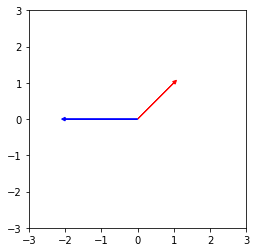

In [100]:
a = [1, 1]
b = [-2, 0]

plt.arrow(0,0, a[0], a[1],head_width=.1, head_length=0.1, color ='red')
plt.arrow(0,0, b[0], b[1],head_width=.1, head_length=0.1, color ='blue')
plt.xlim(-3, 3)          
plt.ylim(-3, 3)
plt.axes().set_aspect('equal')
plt.show()

## 6.2 What does it mean to form a basis?

A basis of a vector space is any set of vectors that are both linearly independant and span said vector space. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [101]:
P = [[1, 2, 3],
     [-1, 0, 7],
     [4, 8, 2]]
P = np.matrix(P)
print(P, '\n')

P[1] = np.add(P[1], P[0])
print(P, '\n')

P[2] = np.add(P[2], np.multiply(-4, P[0]))
print(P, '\n')

P[1] = np.multiply(P[1], (1/2))
print(P, '\n')

P[2] = np.multiply(P[2], -1/10)
print(P, '\n')

[[ 1  2  3]
 [-1  0  7]
 [ 4  8  2]] 

[[ 1  2  3]
 [ 0  2 10]
 [ 4  8  2]] 

[[  1   2   3]
 [  0   2  10]
 [  0   0 -10]] 

[[  1   2   3]
 [  0   1   5]
 [  0   0 -10]] 

[[1 2 3]
 [0 1 5]
 [0 0 1]] 



Since we have three rows with leading 1s, we can say that the rank of P is 3. 

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the vector space that it spans in. This can help us know how many of the rows are linearly independant of each other. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

[0.5 1.5]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


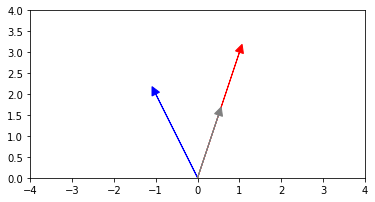

In [102]:
v = [1, 3]
w = [-1, 2]

c = np.dot(w, v) / np.dot(v, v)
proj = np.multiply(c, v)

print(proj)

plt.arrow(0,0, v[0], v[1],head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, w[0], w[1],head_width=.2, head_length=0.2, color ='blue')
plt.arrow(0,0, proj[0], proj[1],head_width=.2, head_length=0.2, color ='gray')
plt.xlim(-4, 4)          
plt.ylim(0, 4)
plt.axes().set_aspect('equal')
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

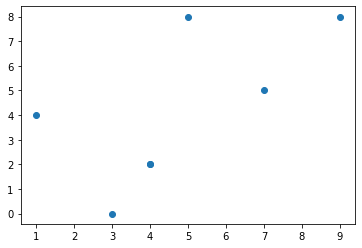

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()